# Predict the critical temperature using Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')


In [3]:
dataset.head()
#

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
dataset.duplicated().sum()

66

In [5]:
dataset= dataset.drop_duplicates()
dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [6]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,...,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000
mean,4.120300,87.544201,72.945331,71.253164,58.474874,1.166782,1.065103,115.751945,33.204053,44.436401,...,3.148856,3.052542,3.051485,1.297020,1.053977,2.042553,1.480890,0.839692,0.674168,34.494532
std,1.438282,29.643136,33.460789,30.990774,36.615381,0.364712,0.401225,54.584784,26.966285,20.019732,...,1.189878,1.044637,1.173221,0.392834,0.380121,1.243242,0.977545,0.485002,0.456038,34.276465
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.522475,52.143839,58.041225,35.247208,0.972995,0.781227,78.899680,16.799962,32.890369,...,2.116279,2.267933,2.090896,1.060857,0.778998,1.000000,0.921250,0.451754,0.306892,5.380000
50%,4.000000,84.922750,60.689235,66.361592,39.873869,1.199541,1.148465,122.906070,26.601500,45.123500,...,2.605455,2.615321,2.428047,1.368922,1.169665,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.374260,85.982703,78.019689,73.056021,1.444537,1.360388,154.119320,38.336200,59.356406,...,4.007317,3.662842,3.909523,1.589027,1.331531,3.000000,1.910400,1.200000,1.021023,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [7]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [ ]:
plt.figure(figsize=(52,18),dpi=100)
sns.heatmap(dataset.corr())

C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

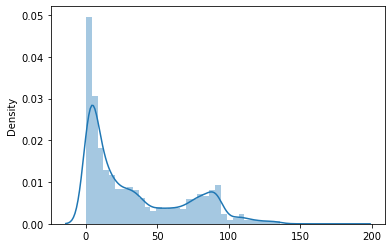

In [9]:
 sns.distplot(dataset.critical_temp.values)

In [10]:
# I am going to drop outliers in my data 
# we have few data where the T_c is larger than 100 K, So I will drop them to make a better prediction
ind_drop = dataset[(dataset['critical_temp']>100)].index
dataset= dataset.drop(ind_drop,axis=0)

### Splitting the dataset into the Training set and Test set

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# feature selection
#def select_features(X_train, y_train, X_test):

# define number of features to evaluate
 #num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
 #   results = list()
 #   for k in num_features:
#  fs = SelectKBest(score_func=f_regression, k= k)
	# learn relationship from training data
#        fs.fit(X_train, y_train)
	# transform train input data
#        X_train_fs = fs.transform(X_train)
	# transform test input data
#        X_test_fs = fs.transform(X_test)
#    return X_train_fs, X_test_fs, fs

# feature selection
#X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

#for i in range(len(fs.scores_)):
#	print('Feature %d: %.3f' % (i, np.mean(fs.scores_[i])) ) 
    
    # plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
#plt.xlabel("Bar Chart of the Input Features (x)")
#plt.ylabel("The Chi-Squared Feature Importance (y)")
#plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.layers import GaussianNoise
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
import os

#Building the ANN
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=1026, input_dim=81, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=1026, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=1))

opt = SGD(lr=0.01, momentum=0.9)
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

# Compile model (required to make predictions)
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Define callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
        
# Training the ANN model on the Training set
history = ann.fit(X_train, y_train, validation_split=0.33, epochs = 300, verbose=1, callbacks=[es, mc])

Train on 9170 samples, validate on 4517 samples
Epoch 1/300
9170/9170 [==============================] - 12s 1ms/sample - loss: 342.2492 - val_loss: 259.1503
Epoch 2/300
9170/9170 [==============================] - 11s 1ms/sample - loss: 253.6750 - val_loss: 221.5208
Epoch 3/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 242.2823 - val_loss: 258.6782
Epoch 4/300
9170/9170 [==============================] - 11s 1ms/sample - loss: 236.6562 - val_loss: 216.0594
Epoch 5/300
9170/9170 [==============================] - 11s 1ms/sample - loss: 230.5854 - val_loss: 205.6113
Epoch 6/300
9170/9170 [==============================] - 11s 1ms/sample - loss: 216.6224 - val_loss: 239.2174
Epoch 7/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 214.7766 - val_loss: 194.1967
Epoch 8/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 211.1948 - val_loss: 192.0583
Epoch 9/300
9170/9170 [==============================] - 10s 1ms/sample 

9170/9170 [==============================] - 10s 1ms/sample - loss: 131.1471 - val_loss: 144.3011
Epoch 75/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 126.8704 - val_loss: 154.3944
Epoch 76/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 128.2385 - val_loss: 146.0576
Epoch 77/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 127.5789 - val_loss: 154.7372
Epoch 78/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 127.8940 - val_loss: 147.0247
Epoch 79/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 125.5154 - val_loss: 145.0361
Epoch 80/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 124.2317 - val_loss: 144.6497
Epoch 81/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 128.8707 - val_loss: 154.3311
Epoch 82/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 123.6010 - val_loss: 144.7276
Epoch 83/300
9

9170/9170 [==============================] - 11s 1ms/sample - loss: 111.9579 - val_loss: 142.0400
Epoch 148/300
9170/9170 [==============================] - 11s 1ms/sample - loss: 112.0065 - val_loss: 141.5548
Epoch 149/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 113.4937 - val_loss: 142.3394
Epoch 150/300
9170/9170 [==============================] - 10s 1ms/sample - loss: 116.2223 - val_loss: 154.2275
Epoch 151/300
 224/9170 [..............................] - ETA: 8s - loss: 104.5193

In [14]:
history.history['val_loss']

[234.26354024978716,
 217.07459630115332,
 201.9656043433763,
 196.90406413877434,
 194.79156638215753,
 195.02432238477664,
 197.92742136882845,
 187.49528271681655,
 212.69205043134843,
 179.91804496878302,
 207.02960441205943,
 223.28846885811208,
 171.45383596430844,
 179.21618611637882,
 173.02519814029108,
 177.66489067609683,
 167.3019607912156,
 171.85772231555708,
 159.99160695239615,
 189.2749560180691,
 206.2643967569996,
 165.69082747082123,
 161.49283940364018,
 181.06872000577098,
 161.49311798886174,
 156.94488155490825,
 178.66207518544851,
 181.40454483285583,
 155.34895034023214,
 158.8767837902759,
 157.16629855105484,
 162.96875421246622,
 175.1574684423447,
 188.87455524531566,
 148.14297866230126,
 154.84178291001572,
 155.22218821527474,
 179.93104118970425,
 153.91359137602024,
 151.16871395030856,
 148.80887350657093,
 155.3830419645548,
 148.2054072450372,
 155.8951586038633,
 168.8368919521194,
 144.25707458367728,
 165.3508388366429,
 142.37379009913153,
 14

In [15]:
# evaluate the model
test_loss = ann.evaluate(X_train, y_train, verbose=1)
# Generate a print
print('------------------------------------------------------------------------')
print("%s: %.2f%%" % (ann.metrics_names[0], test_loss))
print("RMSE: %.2f%% (+/- %.2f%%)" % (np.sqrt(test_loss), np.std(test_loss)))
# save model and architecture to single file
ann.save("model.h5")
print("Saved model to disk")

13687/13687 [==============================] - 2s 179us/sample - loss: 104.0019
------------------------------------------------------------------------
loss: 104.00%
RMSE: 10.20% (+/- 0.00%)
Saved model to disk


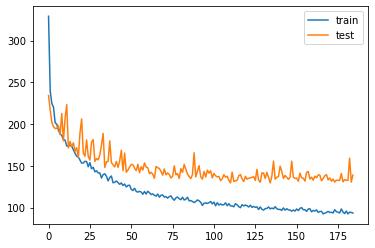

In [16]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Predicting the results of the Test set

In [17]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[70.86 34.  ]
 [80.56 86.  ]
 [ 2.4   2.1 ]
 ...
 [23.79 29.4 ]
 [ 4.48  5.58]
 [ 3.84  5.52]]


In [35]:
# evaluate the model
acc = ann.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1958.877


C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Samira\Anaconda3\envs\tensorflow.session\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


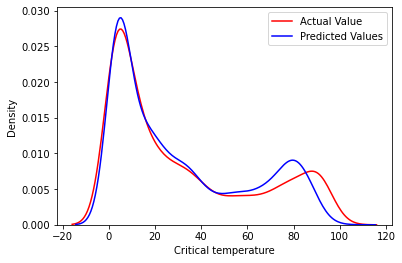

In [31]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.xlabel('Critical temperature')
ax1.legend()

Text(0.5, 1.0, 'Critical Temperature__ANN_Model')

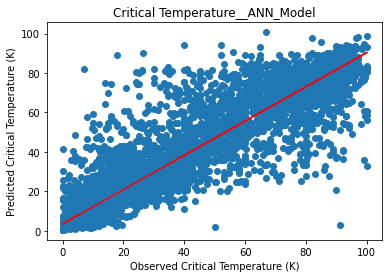

In [20]:
# plot the dataset and the model's line of best fit
# plot the dataset
plt.scatter(y_test, y_pred)
# plot the line of best fit
m, b = np.polyfit(y_test, y_pred, 1)
# m = slope, b=intercept
plt.plot(y_test, m*y_test + b,  color='r')
# show the plot
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')
plt.title('Critical Temperature__ANN_Model')

In [21]:
loss_train= np.sqrt(history.history['loss'])
np.mean(loss_train)

10.829397115859491

In [22]:
loss_test= np.sqrt(history.history['val_loss'])
np.mean(loss_test)

12.165506646677523

In [23]:
import tensorflow as tf
from tensorflow import keras
import h5py

# Initialization
model = keras.models.load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               41984     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2